# Extração de Informações dos Histogramas de Projeção
***

### Importação dos pacotes
***

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import skimage.morphology

### Explorando o funcionamento do gradiente
***

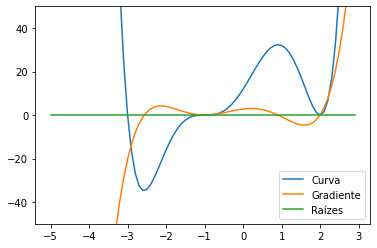

In [2]:
x = np.arange(-5,3, 0.1)
y = (x+3)*((x-2)**2)*((x+1)**3)
plt.plot(x,y, label = 'Curva')
plt.plot(x, np.gradient(y), label="Gradiente")
plt.plot(x, np.zeros(x.shape), label='Raízes')
plt.ylim([-50,50])
plt.legend()

### Funções Úteis
***

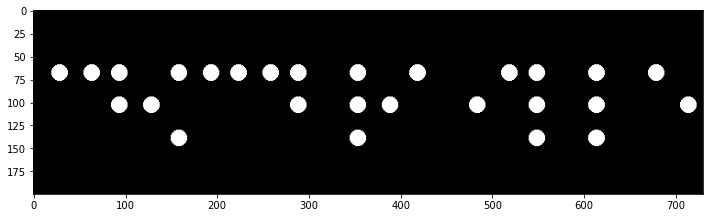

In [3]:
img = cv2.imread("imagens/CHMC-Braille.png", 0)
_ , img_bin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
img_bin = (~img_bin)/255.
plt.figure(figsize=(12,12))
plt.imshow(img_bin, cmap='gray')

In [4]:
def make_histogram_x(img):
    '''
    Organiza os dados da projeção vertical na imagem
    
    Entrada:
    img -> Array da imagem
    
    Saída:
    hist -> Array com os valores do histograma de projeção vertical
    '''

    height, width = img.shape

    hist = np.zeros(width)
    for x in range(height):
        for y in range(width):
            if (img[x][y] == 1):
                hist[y] += 1
    
    return np.array(hist)

In [5]:
def make_histogram_y(img):
    '''
    Organiza os dados da projeção horizontal na imagem
    
    Entrada:
    img -> Array da imagem
    
    Saída:
    hist -> Array com os valores do histograma de projeção horizontal
    '''

    height, width = img.shape

    hist = np.zeros(height)
    for x in range(height):
        for y in range(width):
            if (img[x][y] == 1):
                hist[x] += 1
    
    return np.array(hist)  

(0.0, 730.0)

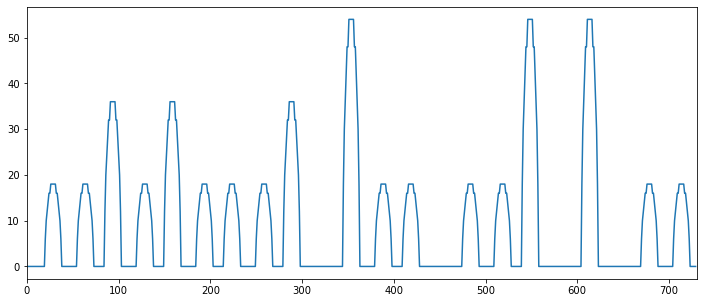

In [48]:
hist_x = make_histogram_x(img_bin)
x = np.arange(len(hist_x))
plt.figure(figsize=(12,5))
plt.plot(x, hist_x)
plt.xlim(0,730)

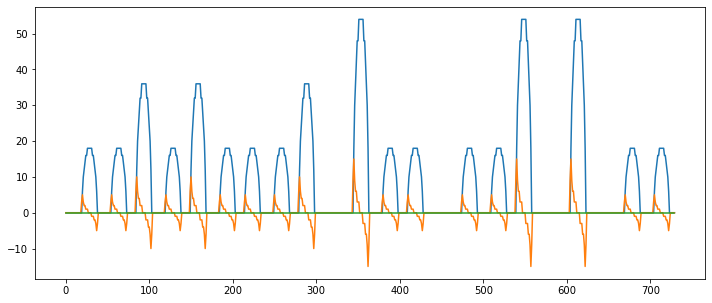

In [38]:
plt.figure(figsize=(12,5))
plt.plot(x, hist_x)
plt.plot(x, np.gradient(hist_x))
plt.plot(x, np.zeros(x.shape))

(0.0, 200.0)

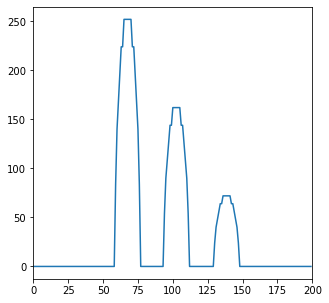

In [49]:
hist_y = make_histogram_y(img_bin)
x = np.arange(len(hist_y))
plt.figure(figsize=(5,5))
plt.plot(x, hist_y)
plt.xlim(0,200)

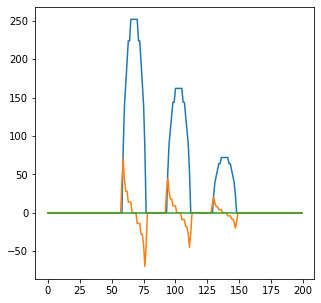

In [9]:
plt.figure(figsize=(5,5))
x = np.arange(len(hist_y))
plt.plot(x, hist_y)
plt.plot(x, np.gradient(hist_y))
plt.plot(x, np.zeros(x.shape))

In [11]:
def degree_histogram(hist):
    '''
    Transforma o histograma de projeção em uma função degrau
    
    Entrada:
    hist -> array do histograma de projeção
    
    Saída:
    degree_hist -> array do histograma de projeção no formato de função degrau
    '''
    
    degree_hist = np.zeros(hist.shape)
    
    for i in range(0, len(hist)):
        if hist[i] != 0:
            degree_hist[i] = 1
    
    return degree_hist

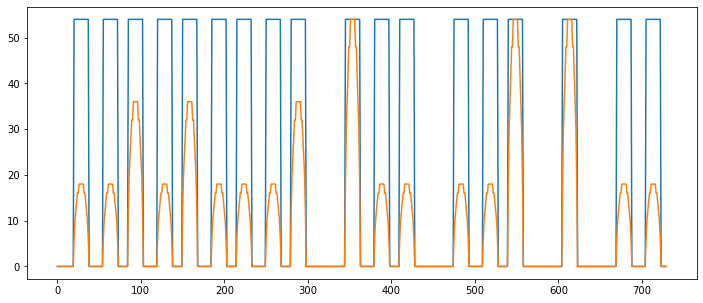

In [13]:
plt.figure(figsize=(12,5))
x = np.arange(0,len(hist_x))
plt.plot(x, degree_histogram(hist_x) * np.max(hist_x))
plt.plot(x, hist_x) 

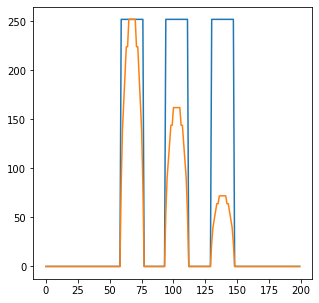

In [16]:
plt.figure(figsize=(5,5))
x = np.arange(0,len(hist_y))
plt.plot(x, degree_histogram(hist_y) * np.max(hist_y))
plt.plot(x, hist_y) 

In [44]:
def delimiter(degree_hist):
    '''
    Delimita as coordenadas em dos pontos pertencentes ao caractere em braille
    
    Entrada:
    degree_hist -> histograma de projeção transformada para a função degrau
    
    Saída:
    delimiter_array -> array de coordenadas que delimitam os pontos 
    '''
    
    delimiter_array = np.zeros(degree_hist.shape)
    for i in range(0, len(degree_hist)):
        ref_in = degree_hist[i]
        try:
            if (ref_in == 1) and (degree_hist[i-1] == 0) and (degree_hist[i+1] == 1):
                delimiter_array[i-1] = 1
            if (ref_in == 1) and (degree_hist[i-1] == 1) and (degree_hist[i+1] == 0):
                delimiter_array[i+1] = 1
        except:
            pass
    
    return delimiter_array

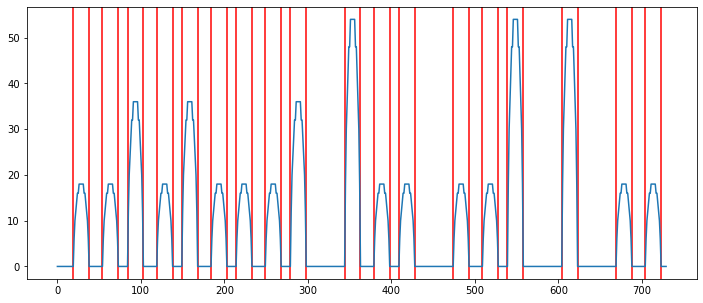

In [33]:
plt.figure(figsize=(12,5))

count = -1 
xcords = list()
for i in range(0, len(hist_x)):
    count += 1
    if (delimiter(degree_histogram(hist_x))[i] == 1):
        xcords.append(count) 
        
x = np.arange(0,len(hist_x))
for xc in xcords:
    plt.axvline(xc, color='red')
plt.plot(x, hist_x) 

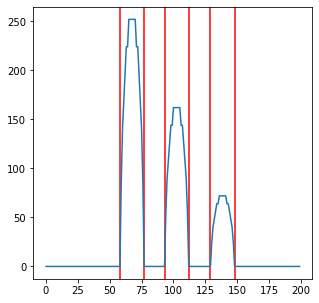

In [40]:
plt.figure(figsize=(5,5))

count = -1 
ycords = list()
for i in range(0, len(hist_y)):
    count += 1
    if (delimiter(degree_histogram(hist_y))[i] == 1):
        ycords.append(count) 
        
x = np.arange(0,len(hist_y))
for yc in ycords:
    plt.axvline(yc, color='red')
plt.plot(x, hist_y) 

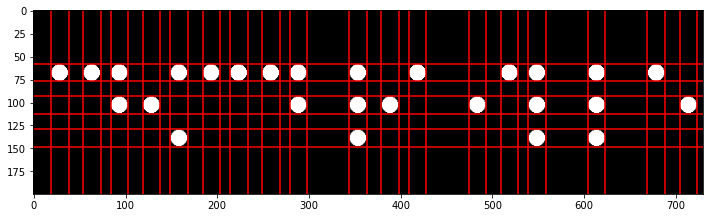

In [50]:
plt.figure(figsize=(12,5))
plt.imshow(img_bin, cmap = 'gray')

hist_x = make_histogram_x(img_bin)
hist_y = make_histogram_y(img_bin)

count = -1 
xcords = list()
for i in range(0, len(hist_x)):
    count += 1
    if (delimiter(degree_histogram(hist_x))[i] == 1):
        xcords.append(count) 
        
x = np.arange(0,len(hist_x))
for xc in xcords:
    plt.axvline(xc, color='red')
    
count = -1 
ycords = list()
for i in range(0, len(hist_y)):
    count += 1
    if (delimiter(degree_histogram(hist_y))[i] == 1):
        ycords.append(count) 
        
x = np.arange(0,len(hist_y))
for yc in ycords:
    plt.axhline(yc, color='red')

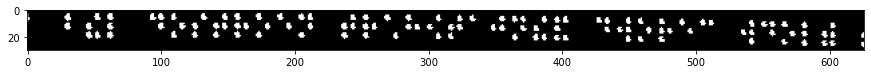

In [57]:
img2 = cv2.imread('imagens/placa-braille-com-inscricoes.jpg',0)
_ , img_bin2 = cv2.threshold(img2, 50, 255, cv2.THRESH_BINARY)
img_bin2 = (~img_bin2[0:30,:])/255.
plt.figure(figsize=(15,15))
plt.imshow(img_bin2, cmap='gray')

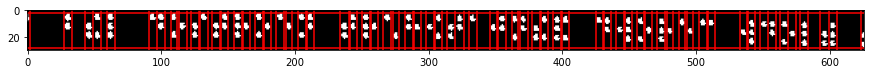

In [59]:
hist_x = make_histogram_x(img_bin2)
hist_y = make_histogram_y(img_bin2)

plt.figure(figsize=(15,15))
plt.imshow(img_bin2, cmap = 'gray')

count = -1 
xcords = list()
for i in range(0, len(hist_x)):
    count += 1
    if (delimiter(degree_histogram(hist_x))[i] == 1):
        xcords.append(count) 
        
x = np.arange(0,len(hist_x))
for xc in xcords:
    plt.axvline(xc, color='red')
    
count = -1 
ycords = list()
for i in range(0, len(hist_y)):
    count += 1
    if (delimiter(degree_histogram(hist_y))[i] == 1):
        ycords.append(count) 
        
x = np.arange(0,len(hist_y))
for yc in ycords:
    plt.axhline(yc, color='red')

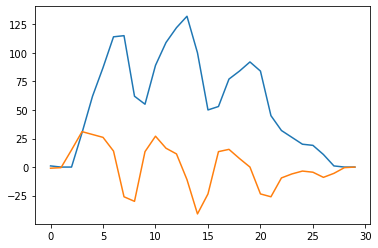

In [62]:
hist_x = make_histogram_x(img_bin2)
hist_y = make_histogram_y(img_bin2)
x = np.arange(0, len(hist_y))

plt.plot(x, hist_y)
plt.plot(x, np.gradient(hist_y))
#plt.xlim([0,50])

In [63]:
hist_y

array([  1.,   0.,   0.,  30.,  62.,  87., 114., 115.,  62.,  55.,  89.,
       109., 122., 132., 100.,  50.,  53.,  77.,  84.,  92.,  84.,  45.,
        32.,  26.,  20.,  19.,  11.,   1.,   0.,   0.])

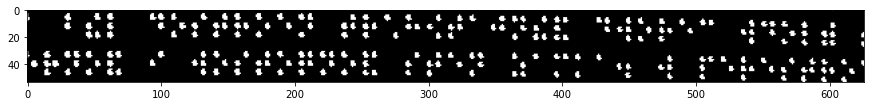

In [193]:
img3 = cv2.imread('imagens/placa-braille-com-inscricoes-duaslinha.jpg',0)
_ , img_bin3 = cv2.threshold(img3, 50, 255, cv2.THRESH_BINARY)
img_bin3 = img_bin3[0:54,:]
img_bin3 = (~img_bin3)/255.
plt.figure(figsize=(15,15))
plt.imshow(img_bin3, cmap='gray')

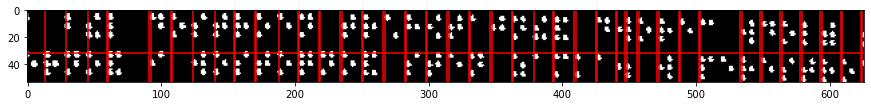

In [199]:
hist_x = make_histogram_x(img_bin3)
hist_y = make_histogram_y(img_bin3)

plt.figure(figsize=(15,15))
plt.imshow(img_bin3, cmap = 'gray')

count = -1 
xcords = list()
for i in range(0, len(hist_x)):
    count += 1
    if (np.abs(delimiter(np.gradient(hist_x)))[i] == 1):
        xcords.append(count) 
        
x = np.arange(0,len(hist_x))
for xc in xcords:
    plt.axvline(xc, color='red')
    
count = -1 
ycords = list()
for i in range(0, len(hist_y)):
    count += 1
    if (np.abs(delimiter(np.gradient(hist_y)))[i] == 1):
        ycords.append(count) 
        
x = np.arange(0,len(hist_y))
for yc in ycords:
    plt.axhline(yc, color='red')

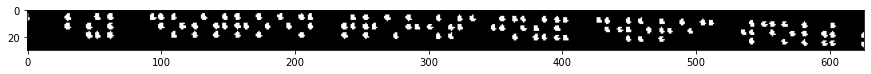

In [200]:
img3 = cv2.imread('imagens/placa-braille-com-inscricoes-duaslinha.jpg',0)
_ , img_bin3 = cv2.threshold(img3, 50, 255, cv2.THRESH_BINARY)
img_bin3 = img_bin3[0:30,:]
img_bin3 = (~img_bin3)/255.
plt.figure(figsize=(15,15))
plt.imshow(img_bin3, cmap='gray')

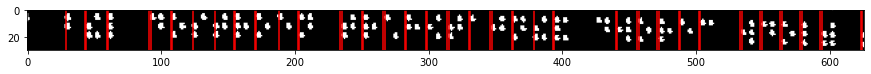

In [201]:
hist_x = make_histogram_x(img_bin3)
hist_y = make_histogram_y(img_bin3)

plt.figure(figsize=(15,15))
plt.imshow(img_bin3, cmap = 'gray')

count = -1 
xcords = list()
for i in range(0, len(hist_x)):
    count += 1
    if (np.abs(delimiter(np.gradient(hist_x)))[i] == 1):
        xcords.append(count) 
        
x = np.arange(0,len(hist_x))
for xc in xcords:
    plt.axvline(xc, color='red')
    
count = -1 
ycords = list()
for i in range(0, len(hist_y)):
    count += 1
    if (np.abs(delimiter(np.gradient(hist_y)))[i] == 1):
        ycords.append(count) 
        
x = np.arange(0,len(hist_y))
for yc in ycords:
    plt.axhline(yc, color='red')

(0.0, 100.0)

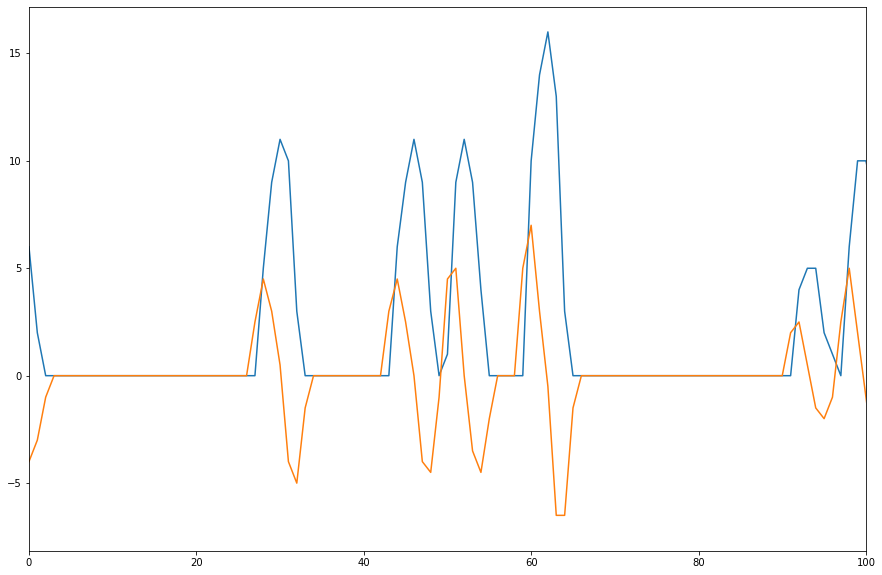

In [210]:
x = np.arange(0,len(hist_x))
plt.figure(figsize=(15,10))
plt.plot(x, hist_x)
plt.plot(x, np.gradient(hist_x))
plt.xlim([0,100])

In [204]:
hist_x

array([ 6.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  5.,  9., 11., 10.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  6.,  9., 11.,  9.,  3.,  0.,  1.,  9.,
       11.,  9.,  4.,  0.,  0.,  0.,  0.,  0., 10., 14., 16., 13.,  3.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  4.,  5.,  5.,  2.,  1.,  0.,  6., 10., 10.,  8.,  2.,  0.,
        0.,  0.,  0.,  0.,  8., 10., 10.,  3.,  0.,  0.,  4.,  5.,  5.,
        3.,  2.,  0.,  0.,  0.,  0.,  3.,  8., 10.,  9.,  3.,  0.,  0.,
        3.,  5.,  5.,  3.,  1.,  0.,  0.,  0.,  0.,  4.,  8., 10.,  9.,
        3.,  0.,  0.,  7., 10., 10.,  5.,  0.,  0.,  0.,  0.,  0.,  5.,
       13., 15., 13.,  4.,  0.,  0.,  4.,  5.,  5.,  2.,  0.,  0.,  0.,
        0.,  0.,  4.,  9., 10.,  9.,  2.,  0.,  0.,  3.,  5.,  5